In [1]:
from utilities import * 
import GetTranscription

C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\torchaudio\extension\extension.py:13: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\torchaudio\backend\utils.py:46: UserWarning: "torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. Please remove the use of flag.
  warnings.warn(


In [2]:
lvpath ="E:\Datasets\Voice\Librivox\dev\LibriSpeech\dev-clean"
libri_train ="E:\Datasets\Voice\LibriSpeech"
mcvpath ="E:\Datasets\Voice\Mozilla Common Voice\en\cv-corpus-6.1-2020-12-11\en"
single_word = "./samples/but bowl.wav"

In [3]:
clips =fcs.get_audio_files(libri_train)
len(clips)

28539

clips in dataset:  28539
hop_length:  80
transcription:  TO SHOW WHAT MY LEAVES WERE LIKE BEFORE I WAS A SCARLET MAPLE I THINK IT WOULD BE AWFUL HOMELY SAID EMMA JANE
words:  23
(123680,)


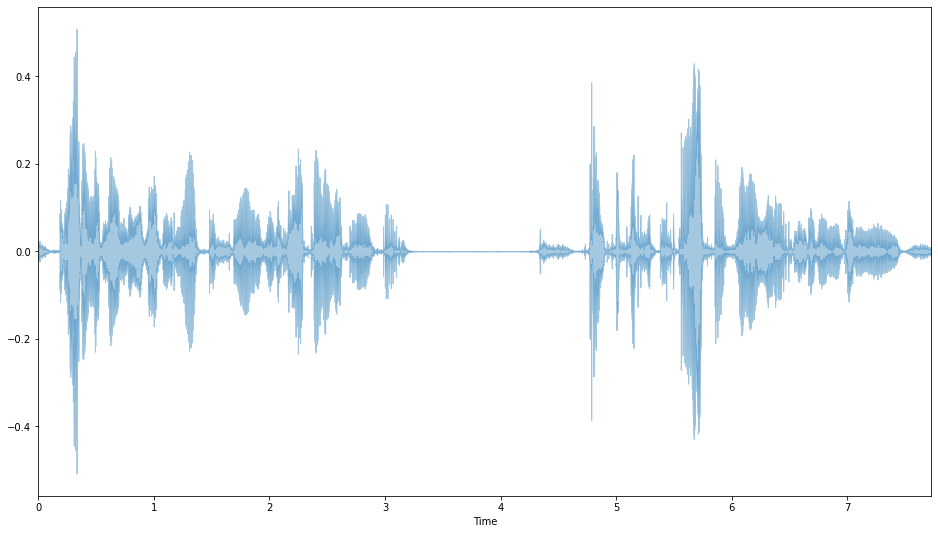

In [4]:
plt.figure(figsize=(16,9))
sr = 16000
hop_length = int(sr/200)
frame_length = int(hop_length*2)
clips = fcs.get_audio_files(libri_train)
clip = clips[2402]
audio, sr = librosa.load(clip, sr=sr)
transcription = GetTranscription.get_file_transcript(clip)
print("clips in dataset: ", len(clips))
print("hop_length: " ,hop_length)
print("transcription: ", transcription)
print("words: ", len(transcription.split(" ")))
print(audio.shape)
librosa.display.waveplot(audio,sr=sr,alpha=0.4)
ipd.Audio(audio, rate=sr)

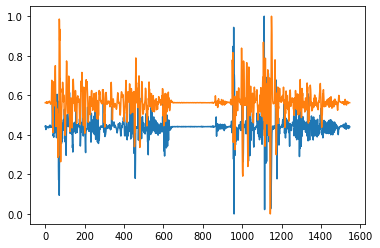

In [5]:
f = librosa.feature.rms(audio,hop_length=hop_length, frame_length= frame_length).flatten()
d = librosa.feature.delta(f)
rmse_diff = np.zeros_like(f)
rmse_diff[1:] = np.diff(f)
d_diff = np.zeros_like(d)
d_diff[1:] = np.diff(d)

plt.plot(normalize(rmse_diff))
plt.plot(normalize(d_diff))

In [6]:
audio.shape
#n.shape
hop_length

80

In [7]:
#Split by silence
from energy_split import *
segments = Split(audio,hop_length,frame_length,min_duration=3, energy_threshold=0.05)
print(len(segments))
print(segments)

21
[[36, 42], [44, 106], [110, 208], [214, 273], [295, 307], [337, 421], [423, 457], [476, 524], [538, 575], [599, 614], [954, 979], [999, 1005], [1024, 1060], [1077, 1091], [1109, 1150], [1170, 1189], [1206, 1290], [1308, 1329], [1333, 1344], [1346, 1389], [1398, 1487]]


(4960,)
[44, 106]


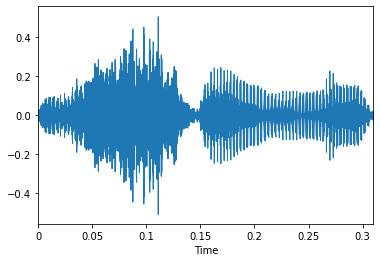

In [8]:
# checking segment audio
selected = 1
section = segments[selected]
section_data = audio[section[0]*hop_length:section[1]*hop_length]
print(section_data.shape)
print(section)

normed = normalize(librosa.feature.rms(audio[section[0]*hop_length:section[1]*hop_length], hop_length=hop_length,
                            frame_length=frame_length).flatten())
librosa.display.waveplot(section_data, sr=sr)
ipd.Audio(audio[section[0]*hop_length:section[1]*hop_length], rate=sr)


In [9]:
from m_dictionary import *
#print(get_phonemes_for_word(query_string='bronze'))
#print(get_phonemes_for_word(query_string='slip'))
sectionphones = get_phonemes_for_sentence(sentence = 'to show what')
phone_array = []
for word in sectionphones:
    for char in word[0]:
        if char != "ˈ" and char != '\u200d':
            if char =='ː':
                phone_array[-1] = phone_array[-1]+char
            else:
                phone_array.append(char)
print(phone_array)
print(sectionphones)
len(phone_array)

['t', 'uː', 'ʃ', 'ə', 'ʊ', 'w', 'ɒ', 't']
[['tˈuː'], ['ʃˈə\u200dʊ'], ['wˈɒt']]


8

In [16]:
#split by rate of change of energy
section = segments[selected]
part = audio[section[0] * hop_length:section[1] * hop_length]
phone_boundaries = Split2(part, hop_length=hop_length, frame_length=frame_length, sr= sr, min_duration=hop_length*6)
print(len(part))
#phone_boundaries.append(len(part))
print(hop_length*6)
print(part.shape)
print(phone_boundaries)
print(len(phone_boundaries))

4960
480
(4960,)
[0, 505, 2397, 4412, 4960]
5


In [21]:
mnum = 3
ipd.Audio(part[phone_boundaries[mnum]:phone_boundaries[mnum+1]], rate=sr)

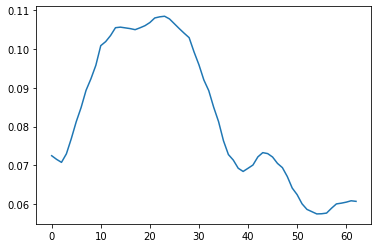

In [12]:
#librosa.display.waveplot(audio[section[0]*hop_length:section[1]*hop_length], sr=sr)
plt.plot(librosa.feature.rms(audio[section[0]*hop_length:section[1]*hop_length], hop_length=hop_length).flatten())

4960
(4960,)
4960


C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2210: RuntimeWarning: invalid value encountered in log1p
  smooth = np.exp(-gain * (np.log(eps) + np.log1p(S_smooth / eps)))
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2218: RuntimeWarning: invalid value encountered in log1p
  S_out = (bias ** power) * np.expm1(power * np.log1p(S * smooth / bias))


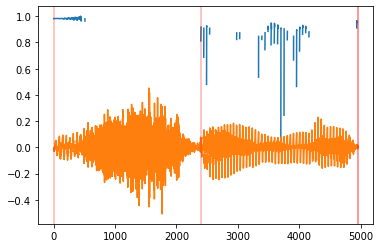

C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1400
  warnings.warn(
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\display.py:822: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\display.py:974: Matplotl

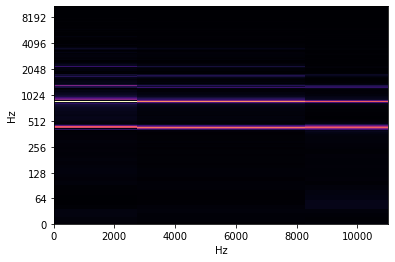

In [13]:
section = segments[selected]
part = audio[section[0]*hop_length:section[1]*hop_length]
e =librosa.pcen(part,hop_length=hop_length)
d = normalize(librosa.feature.delta(e))
print(len(e))
print(part.shape)
print(len(d))
#librosa.display.waveplot(part)
plt.plot(d)
plt.plot(part)
a = 2800
b = 4200
for x in phone_boundaries:
    plt.axvline(x=x, ymin=-0.4, ymax=1, c='r', alpha=0.3)
#plt.axvline(x=b, ymin=-0.4, ymax=1, c='r', alpha=0.3)
plt.show()
stft = librosa.stft(part[a:b])
librosa.display.specshow(stft, y_axis="log", x_axis="linear")
ipd.Audio(part[a:b], rate =sr)

In [14]:
stft[-1].sum()
stft_sum = []
i = 0
for l in stft:
    print(i,"  ", l.sum())
    stft_sum.append(l.sum())
    i+=1
    

0    (0.44240052+0j)
1    (-0.4833731-0.700289j)
2    (0.89973956+0.23694968j)
3    (-1.4604893+1.2744823j)
4    (0.16256678-2.1995447j)
5    (1.3618695+0.8582214j)
6    (-0.9977728+0.6176851j)
7    (0.026156828-1.180423j)
8    (1.0081049+1.0080092j)
9    (-0.87678593-0.25577065j)
10    (0.08635232-0.4041351j)
11    (-0.34535432+0.44175667j)
12    (1.2764747+0.53808093j)
13    (-1.3429701-0.7960782j)
14    (0.81306857-0.12743297j)
15    (-0.7287632+0.7622429j)
16    (0.60940963-0.14286028j)
17    (-0.3870271-0.70537996j)
18    (0.461379+0.54203737j)
19    (-0.9661601-0.04502088j)
20    (1.0882968-0.12798443j)
21    (-0.40006185-0.07015249j)
22    (-0.09626326+0.12965481j)
23    (-0.4945572-0.33567005j)
24    (1.5567453+0.50587046j)
25    (-1.2037821-0.06963141j)
26    (0.26480284-0.6067037j)
27    (0.003652811+0.6704784j)
28    (0.47420514+0.55212903j)
29    (-0.96381587-1.0183718j)
30    (1.0363939+0.025498744j)
31    (-0.9837894+1.11429j)
32    (0.309025-0.7702062j)
33    (0.36017972

757    (-0.12441896-0.01940513j)
758    (0.04577101-0.014187284j)
759    (-0.045914743+0.09446205j)
760    (-0.031890698-0.13691597j)
761    (0.073738985+0.08206188j)
762    (-0.019035779-0.029957645j)
763    (-0.059145726+0.05844488j)
764    (0.076661184-0.023874406j)
765    (-0.022374831-0.05604411j)
766    (0.0039530583+0.010726467j)
767    (-0.008676261+0.06322715j)
768    (-0.008449154-0.043606862j)
769    (-0.00038731843+0.0051082047j)
770    (0.033672705-0.014155949j)
771    (-0.05358896+0.06079603j)
772    (0.023672244-0.06254743j)
773    (0.014458864+0.01253213j)
774    (-0.010892025-0.0067678723j)
775    (-0.07288702+0.028131131j)
776    (0.13938646-0.013450591j)
777    (-0.09266048-0.015685134j)
778    (0.059106622+0.0056594163j)
779    (-0.06983188+0.011802469j)
780    (0.082956366+0.027680818j)
781    (-0.08116299-0.05635888j)
782    (0.065258145-0.001521376j)
783    (-0.026794653+0.045132633j)
784    (0.0031840317+0.006629872j)
785    (-0.011470791-0.043174084j)
786    (0

In [15]:
data = librosa.feature.delta(normalize(librosa.pcen(part,hop_length=hop_length)))
bins = np.linspace(0, 1, 8)
#
bins = [0,0.2,0.5,1]
digitized = np.digitize(data, bins)
bin_means = [data[digitized == i].mean() for i in range(1, len(bins))]
print(digitized)
#plt.plot(digitized)
print(40*hop_length)
print(bin_means)
print(bins)
bin_means = (np.histogram(data, bins, weights=data)[0] /
             np.histogram(data, bins)[0])


[1 1 1 ... 4 4 4]
3200
[0.00013776295470024227, nan, nan]
[0, 0.2, 0.5, 1]


C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2210: RuntimeWarning: invalid value encountered in log1p
  smooth = np.exp(-gain * (np.log(eps) + np.log1p(S_smooth / eps)))
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\spectrum.py:2218: RuntimeWarning: invalid value encountered in log1p
  S_out = (bias ** power) * np.expm1(power * np.log1p(S * smooth / bias))
<ipython-input-15-e00eabec5967>:6: RuntimeWarning: Mean of empty slice.
  bin_means = [data[digitized == i].mean() for i in range(1, len(bins))]
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-15-e00eabec5967>:12: RuntimeWarning: invalid value encountered in true_divide
  bin_means = (np.histogram(data, bins, weights=data)[0] /


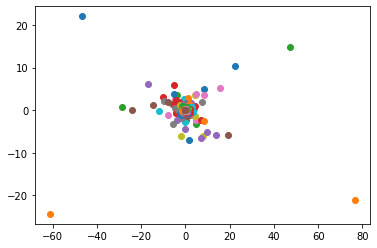

In [16]:
a = stft_sum[0]
plt.scatter([0,a.real],[0,a.imag])
for a in stft_sum:
    #print(type(a))
    plt.scatter([0,a.real],[0,a.imag])

In [17]:
voiced = []
silenced = np.empty(audio.shape)
for x in segments:
    silenced[x[0]*hop_length:x[1]*hop_length] = audio[x[0]*hop_length:x[1]*hop_length]
    for i in audio[x[0]*hop_length:x[1]*hop_length]:
        voiced.insert( len(voiced),i )
voiced = np.array(voiced)
print(voiced.shape)
silenced.shape


(67520,)


(123680,)

In [18]:
# place all the phones in a list
phones = []
for p in parts:
    

SyntaxError: unexpected EOF while parsing (<ipython-input-18-31615ac600e7>, line 4)

In [ ]:
print("transcription: ", transcription)
ipd.Audio(voiced,rate=sr)

In [ ]:
#overlay voiced sections on original clip
testering = np.empty(audio.shape)
for x in segments:
    #print(x[0]*hop_length, x[1]*hop_length)
    
    testering[x[0]*hop_length: x[1]*hop_length]= audio[x[0]*hop_length:x[1]*hop_length]
plt.plot(audio)
plt.plot(testering)

In [ ]:
print(audio.shape)
print(testering.shape)
print(type(audio))
print(type(testering))

In [ ]:
plt.figure(figsize=(24,24))
plt.plot(audio)
for x in segments:
    x1 = x[0]*hop_length
    x2 = x[1]*hop_length
    plt.bar(x1, height=1.5, width=(x2-x1), bottom=-0.75, alpha=0.2)
    

In [ ]:
x = voiced[18]
start, end =int(x[0]*hop_length ), int(x[1]*hop_length)
ipd.Audio(audio[start:end],rate=sr)

In [ ]:
start,end = 0, hop_length
test =[]
while end < len(audio):
    test.append([start,end,np.nanmean(librosa.pcen(audio[start:end]))])
    start+=20
    end+=20
test =np.array(test)    

In [ ]:
energy = np.array([
    sum(abs(audio[i:i+frame_length]**2))
    for i in range(0, len(audio), hop_length)
])
energy.shape

In [ ]:
#test =np.array(test)
#plt.plot( test[:,1],test[:,2])
test[:,2].shape


#audio.shape

In [ ]:
plt.figure(figsize=(16,9))
#plt.plot(range(0,len(test)), normalize(test[:,2]) )
plt.plot(audio,alpha=0.4)
plt.plot(normalize(audio),alpha=0.4)
plt.show()

In [ ]:
librosa.feature.rms(audio,hop_length=hop_length)[0].shape

In [ ]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(projection='3d')
plt.scatter(three[:,1],three[:,0],three[:,2])

In [ ]:
model = sklearn.cluster.KMeans(n_clusters=3)
labels = model.fit_predict(three)
print(labels)

In [ ]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(projection='3d')
plt.scatter(three[labels==0,0], three[labels==0,1],three[labels==0,2], c='b')
plt.scatter(three[labels==1,0], three[labels==1,1],three[labels==1,2], c='r')
plt.scatter(three[labels==2,0], three[labels==2,1],three[labels==2,2], c='g')
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Energy (scaled)')
plt.legend(('Class 0', 'Class 1'))

In [ ]:
x= EM.predict(three)

In [ ]:
fig = plt.figure(figsize=(24,24))
ax = fig.add_subplot(projection='3d')
plt.scatter(three[x==0,0], three[x==0,1], three[x==0,2], c='r')
plt.scatter(three[x==1,0], three[x==1,1], three[x==1,2], c='b')
plt.scatter(three[x==2,0], three[x==2,1],  three[x==2,2],c='y')
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Energy (scaled)')
plt.legend(('Silence', 'Voiced', 'Unvoiced'))

In [ ]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(projection='3d')
plt.scatter(three[x==0,0], three[x==0,1],three[x==0,2], c='r')
plt.scatter(three[x==1,0], three[x==1,1],three[x==1,2], c='b')
plt.scatter(three[x==2,0], three[x==2,1],three[x==2,2], c='y')
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Energy (scaled)')
plt.legend(('Class 0', 'Class 1'))

In [ ]:
normalize(three[:,1])
np.argmax(three[:,0])
np.set_printoptions(formatter={'int': lambda x: "{0:0.3f}".format(x)})
print(three[:,0])

In [ ]:
print(len(x))
print(x)
x[0:150]

In [ ]:
plt.figure(figsize=(21,9))
#raudio= librosa.resample(y=audio, orig_sr=sr, target_sr=100)
for s in range(len(x)):
    if x[s]==2:
       plt.axvline(x=s*220, ymin=-0.4, ymax=1, c='r', alpha=0.3)
    if x[s]==1:
       plt.axvline(x=s*220, ymin=-0.4, ymax=1, c='y', alpha=0.3)
    if x[s]==0:
       plt.axvline(x=s*220, ymin=-0.4, ymax=1, c='g', alpha=0.3)
plt.plot(audio, alpha=0.3)



In [ ]:
librosa.effects.split(audio, top_db=,  frame_length=2048, hop_length=220)

In [ ]:
plt.figure(figsize=(16,9))
scaled_audio= (sklearn.preprocessing.minmax_scale(voiced, axis=0))
audio_range =  np.max(scaled_audio)- np.min(scaled_audio)
mean =np.mean(scaled_audio)
print(audio_range)
y = np.full(len(voiced),mean-audio_range*0.01) #audio non silence min
y1 = np.full(len(voiced),mean+audio_range*0.01) #audio non silence max
y2 = np.full(len(voiced),0.8)
y3 = np.full(len(voiced),0.15)
energy = librosa.pcen(np.array(voiced))
delta_energy = librosa.feature.delta(energy)
delta_energy2 = librosa.feature.delta(delta_energy)

plt.plot(sklearn.preprocessing.minmax_scale(voiced, axis=0)) # blue
plt.plot(sklearn.preprocessing.minmax_scale(voiced, axis=0)) #yellow
plt.plot(sklearn.preprocessing.minmax_scale(delta_energy, axis=0)) #green
plt.plot(sklearn.preprocessing.minmax_scale(delta_energy2, axis=0))
plt.plot(y,c='r')
plt.plot(y1,c='r')
plt.plot(y2,c='g')
plt.plot(y3,c='g')
#plt.plot(sklearn.preprocessing.minmax_scale(delta_energy2, axis=0))




In [ ]:
plt.figure(figsize=(16,9))
energy = librosa.pcen(audio[19800:27060])
#plt.plot(audio) #-0.4-0.6
plt.plot(normalize(energy))
plt.plot(normalize(audio[19800:27060]))

for x in split_by_energy(audio[19800:27060]):
    plt.axvline(x=x,ymin= -1,ymax= 1, label=str(x), c='g')
for x in energy:
    if math.sqrt(x**2)<0.02:
        plt.axvline(x=x,ymin= -1,ymax= 1, label=str(x), c='r')
plt.show()

In [ ]:
energy = normalize(librosa.pcen(audio))
delta_energy = normalize(librosa.feature.delta(energy))
delta_energy2 =normalize(librosa.feature.delta(delta_energy))

plt.figure(figsize=(16,9))
plt.plot(audio[:]) #-0.4-0.6
plt.plot(energy) #-0.4-0.6
plt.plot(delta_energy[:]) #0- -30
plt.plot(delta_energy2[:]) #0-2 
plt.show()

print(energy)
print (delta_energy)
#print (min(energy))

In [ ]:
stft = librosa.stft(np.array(voiced), hop_length=hop_length)
print(stft.shape)
spectogram = np.abs(stft)

log_spectogram = librosa.amplitude_to_db(spectogram)
spectogram

plt.figure(figsize=(21,9))
librosa.display.specshow(log_spectogram, y_axis='log')
plt.xlabel("Time")
plt.ylabel("Freq")
plt.colorbar()
plt.show()

In [ ]:
x = audio 
spectral_centroids = librosa.feature.spectral_centroid(audio, sr=sr, hop_length=220)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, hop_length=220)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3,  hop_length=220)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4,  hop_length=220)[0]
#spectral_bandwidth_5 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=5, hop_length=220)[0]
#spectral_bandwidth_6 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=6, hop_length=220)[0]
plt.figure(figsize=(15, 12))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
#plt.plot(t, normalize(spectral_bandwidth_5), color='b')
#plt.plot(t, normalize(spectral_bandwidth_6), color='pink')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

In [ ]:
from joblib import dump, load

In [ ]:
dump(EM, 'silenceVoiceClusterEM.joblib') 

In [ ]:
EM = load('EM2000spherical_hopLength40.joblib') 

In [ ]:
a_file= open("test.txt","w")
np.savetxt(a_file, three)
a_file.close()